In [1]:
import datascience
import numpy as np
import graphviz

from datascience import *
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.base import ClassifierMixin
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_recall_fscore_support


In [2]:
t1 = Table.read_table("Climate1SupportiveLevel.csv",sep=',')

In [3]:
t1_positive = t1.where( 'SupportiveLabel', are.equal_to(1))
t1_negative = t1.where( 'SupportiveLabel', are.equal_to(0))
t1_positive

Unnamed: 0,ID,Text,SupportiveLabel
0,962_Cleand_Climate1.csv,RT @kasserolees: Energy is the #1 contributer to climate ...,1
1,885_Cleand_Climate1.csv,RT @edelman_barbara: @msnbc why don t you have a climate ...,1
5,1075_Cleand_Climate1.csv,RT @sydneyleemarco: nothing like an 80 degree october da ...,1
6,85_Cleand_Climate1.csv,@MerlenesMemos @CNN It's not an act of god. Climate chan ...,1
15,39_Cleand_Climate1.csv,@BjornLomborg I think looking at climate change in terms ...,1
16,608_Cleand_Climate1.csv,RT @KateRaworth: If you feel the dissonance between the ...,1
19,326_Cleand_Climate1.csv,I cannot find one attribute that qualifies this man for ...,1
20,121_Cleand_Climate1.csv,@Weinsteinlaw His base doesn t care. unaffiliated who su ...,1
22,931_Cleand_Climate1.csv,RT @idea2go: The definition of #ClimateBreakdown from @G ...,1
23,1275_Cleand_Climate1.csv,sexy I don't die of natural causes at least a decade bef ...,1


In [5]:
data = t1_positive.append(t1_negative)

In [6]:
data_tagged_X= list(data['Text'])
data_tagged_Y= list(data['SupportiveLabel'])

print('tagged data input size', len(data_tagged_X))
print('tagged data prediction size', len(data_tagged_Y))

tagged data input size 1283
tagged data prediction size 1283


In [9]:
skf = StratifiedKFold(n_splits=5, random_state=1, shuffle= True)

In [10]:
fold = 1
precision = []
recall = []
f1 = []

In [12]:
for train_index, test_index in skf.split(data_tagged_X, data_tagged_Y):
    print("Fold Number:", fold)
    print("Training Data Index:", train_index)
    print("Testing Data Index:", test_index)
    
    x_train= list(data.take(train_index)['Text']) 
    y_train= list(data.take(train_index)['SupportiveLabel'])
    x_test= list(data.take(test_index)['Text'])
    y_test= list(data.take(test_index)['SupportiveLabel'])
    print("Testing Data Target Output:", y_test)
    
    count_vect= CountVectorizer(token_pattern='(([#@]|[0-9]|[a-z]|[A-Z])+)',analyzer='word',min_df = 3)
    x_word_vect = count_vect.fit_transform(x_train)
    clf = tree.DecisionTreeClassifier(criterion='entropy', random_state = 100, max_depth =7, min_samples_leaf =2)
    clf.fit(x_word_vect, y_train) 
    
    dot_data= tree.export_graphviz(clf, out_file=None, feature_names=count_vect.get_feature_names())
    graph = graphviz.Source(dot_data)
    file_name = 'SupportClassifier-Fold' + str(fold)
    graph.render(file_name)
    print("Saving Decision Tree Visualization in", file_name)
    
    x_test_word_vect = count_vect.transform(x_test)
    predicted_y_test= clf.predict(x_test_word_vect)
    print("Testing Data Prediction Output:", predicted_y_test)
    
    precision.append(precision_score(y_test, predicted_y_test)) 
    recall.append(recall_score(y_test, predicted_y_test)) 
    f1.append(f1_score(y_test, predicted_y_test))
    print("Precision Score:", precision_score(y_test, predicted_y_test))    
    print("Recall Score:", recall_score(y_test, predicted_y_test))    
    print("f1 Score:", f1_score(y_test, predicted_y_test)) 
    fold=fold+1

Fold Number: 6
Training Data Index: [   1    2    3 ... 1280 1281 1282]
Testing Data Index: [   0    8   13   16   19   23   34   35   40   41   47   50   56   57
   59   60   61   65   66   68   69   74   76   81   84   85   92  101
  104  108  111  117  118  120  132  134  139  148  154  159  161  172
  180  181  189  201  207  214  223  241  242  245  247  255  257  259
  262  273  274  280  286  289  301  305  314  329  339  343  345  346
  347  349  350  353  358  366  375  378  379  383  385  386  396  408
  412  415  419  421  422  432  437  441  448  449  455  472  481  482
  483  486  493  494  495  504  506  507  509  518  519  528  530  531
  538  546  552  558  570  573  575  576  579  587  597  601  604  615
  617  618  623  624  634  636  639  651  658  662  663  679  680  686
  703  706  707  713  716  719  720  721  725  733  745  747  750  754
  756  757  763  765  775  778  781  782  783  784  785  801  806  808
  823  827  835  836  848  851  863  873  876  878  881 

Saving Decision Tree Visualization in SupportClassifier-Fold9
Testing Data Prediction Output: [1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1
 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 1 1 1 0 1 1 0 0 1 1 1 0 1 1 0 0 1
 1 0 0 1 0 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 0 1 0
 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1
 0 1 1 1 1 1 0 1 1 1 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 1 1 1 1 1 0 1 1 0 0 1 0
 0 1 0 1 0 0 1 1 1 1 1 1 1 0 0 0 1 1 0 1 0 1 1 1 1 1 0 1 0 1 1 0 1 1]
Precision Score: 0.6101694915254238
Recall Score: 0.7552447552447552
f1 Score: 0.675
Fold Number: 10
Training Data Index: [   0    1    2 ... 1280 1281 1282]
Testing Data Index: [   7   10   15   20   22   25   26   37   43   64   71   72   75   77
   86   87   96  126  129  130  140  141  144  149  151  152  155  166
  170  176  178  183  190  193  196  198  209  210  215  231  235 

In [13]:
print("Precision List:", precision)    
print("Recall List:", recall)    
print("f1 List:", f1) 

Precision List: [0.6491228070175439, 0.6802721088435374, 0.6130952380952381, 0.6101694915254238, 0.6273291925465838, 0.6491228070175439, 0.6802721088435374, 0.6130952380952381, 0.6101694915254238, 0.6273291925465838]
Recall List: [0.7708333333333334, 0.6993006993006993, 0.7202797202797203, 0.7552447552447552, 0.7062937062937062, 0.7708333333333334, 0.6993006993006993, 0.7202797202797203, 0.7552447552447552, 0.7062937062937062]
f1 List: [0.7047619047619048, 0.689655172413793, 0.662379421221865, 0.675, 0.6644736842105262, 0.7047619047619048, 0.689655172413793, 0.662379421221865, 0.675, 0.6644736842105262]


In [14]:
print("Average Precision:", np.mean(precision))
print("Averag Recall:", np.mean(recall))   
print("Averag F1:", np.mean(f1)) 

Average Precision: 0.6359977676056654
Averag Recall: 0.730390442890443
Averag F1: 0.6792540365216178


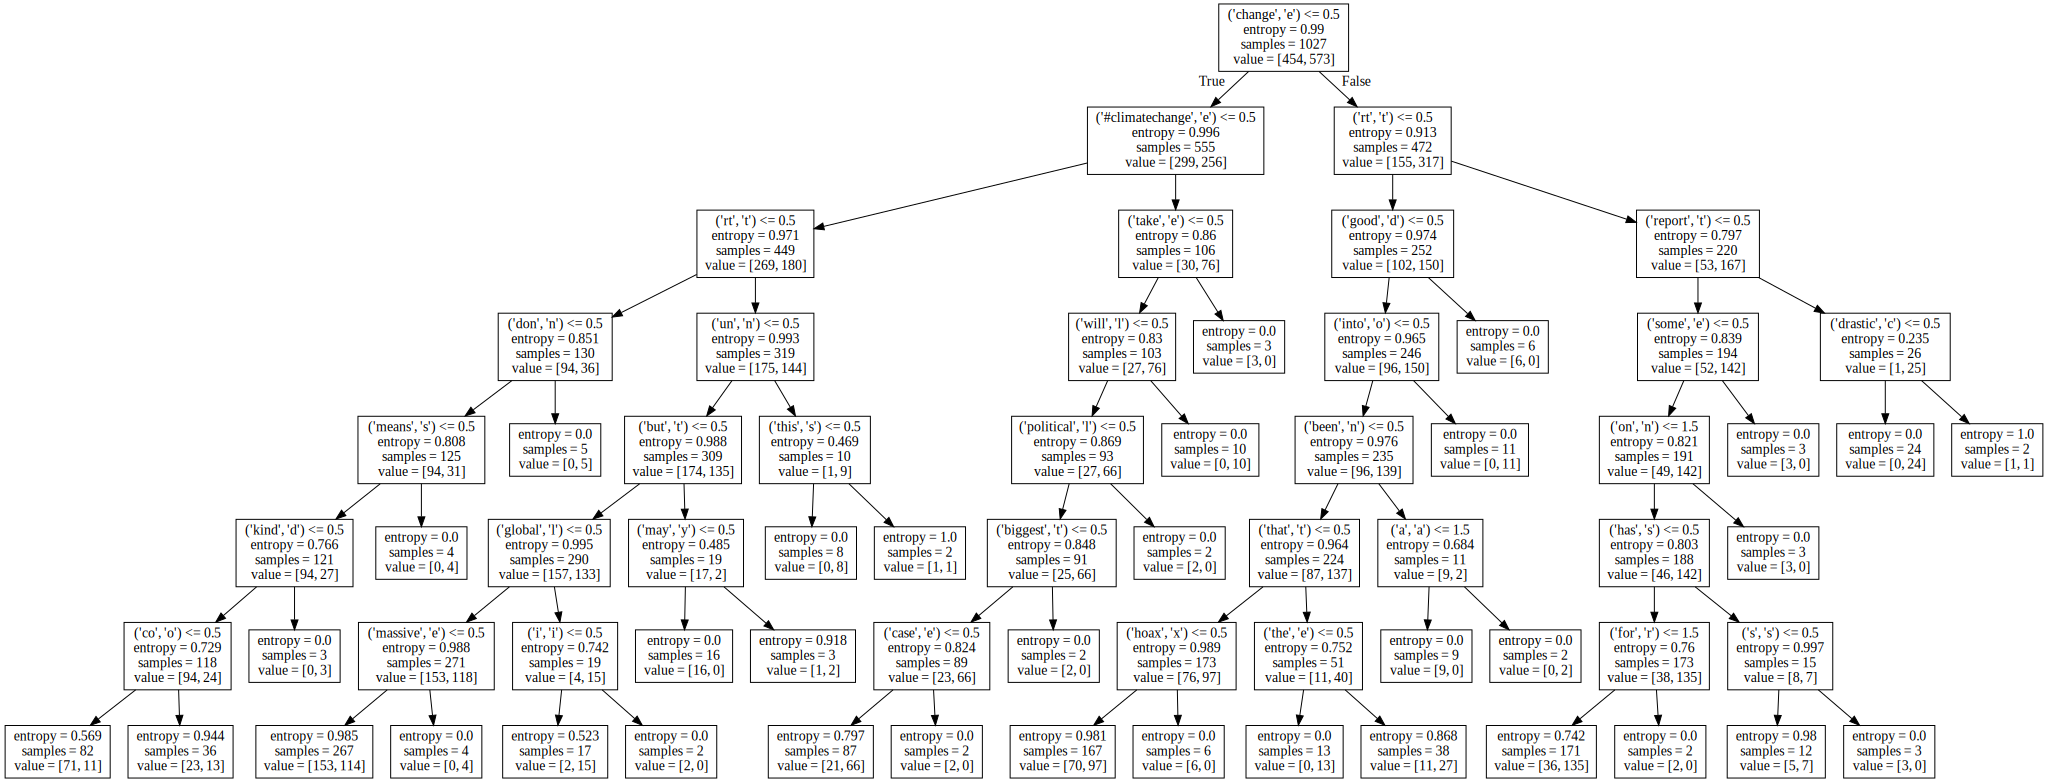

In [33]:
graph